<a href="https://colab.research.google.com/github/SiriBatchu/Apache-Beam/blob/main/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Data

In [14]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/train_1000.csv')

# Take a quick look at the first few rows
df.head()


,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",1131660440785968503,"{""continent"": ""Asia"", ""subContinent"": ""Western...",1131660440785968503_1472830385,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472830385,1,1472830385
1,Organic Search,20160902,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",377306020877927890,"{""continent"": ""Oceania"", ""subContinent"": ""Aust...",377306020877927890_1472880147,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472880147,1,1472880147
2,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",3895546263509774583,"{""continent"": ""Europe"", ""subContinent"": ""South...",3895546263509774583_1472865386,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472865386,1,1472865386
3,Organic Search,20160902,"{""browser"": ""UC Browser"", ""browserVersion"": ""n...",4763447161404445595,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",4763447161404445595_1472881213,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472881213,1,1472881213
4,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",27294437909732085,"{""continent"": ""Europe"", ""subContinent"": ""North...",27294437909732085_1472822600,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472822600,2,1472822600


In [15]:
df.columns

Index(['channelGrouping', 'date', 'device', 'fullVisitorId', 'geoNetwork',
       'sessionId', 'socialEngagementType', 'totals', 'trafficSource',
       'visitId', 'visitNumber', 'visitStartTime'],
      dtype='object')

# Checking Missing Values

In [16]:
# Check for missing values
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0])
print(missing_data)

Series([], dtype: int64)
channelGrouping         0
date                    0
device                  0
fullVisitorId           0
geoNetwork              0
sessionId               0
socialEngagementType    0
totals                  0
trafficSource           0
visitId                 0
visitNumber             0
visitStartTime          0
dtype: int64


# Checking Duplicates

In [17]:
# Check for duplicates
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

# Remove duplicates if necessary
df = df.drop_duplicates()

Number of duplicate rows: 0


In [18]:
# Overview of data types and missing values
df.info()

# Summary statistics for numerical columns
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   channelGrouping       999 non-null    object
 1   date                  999 non-null    int64 
 2   device                999 non-null    object
 3   fullVisitorId         999 non-null    uint64
 4   geoNetwork            999 non-null    object
 5   sessionId             999 non-null    object
 6   socialEngagementType  999 non-null    object
 7   totals                999 non-null    object
 8   trafficSource         999 non-null    object
 9   visitId               999 non-null    int64 
 10  visitNumber           999 non-null    int64 
 11  visitStartTime        999 non-null    int64 
dtypes: int64(4), object(7), uint64(1)
memory usage: 93.8+ KB


,date,fullVisitorId,visitId,visitNumber,visitStartTime
count,999.0,9.990000e+02,9.990000e+02,999.000000,9.990000e+02
mean,20160902.0,4.549564e+18,1.472841e+09,2.035035,1.472841e+09
std,0.0,3.052573e+18,2.240813e+04,6.518647,2.240815e+04
min,20160902.0,2.953262e+15,1.472800e+09,1.000000,1.472800e+09
25%,20160902.0,1.651451e+18,1.472824e+09,1.000000,1.472824e+09
50%,20160902.0,4.418539e+18,1.472840e+09,1.000000,1.472840e+09
75%,20160902.0,7.256622e+18,1.472858e+09,1.000000,1.472858e+09
max,20160902.0,9.991882e+18,1.472886e+09,136.000000,1.472886e+09


In [19]:
# Check what data is inside the 'totals' column
df['totals'].head()


,totals
0,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",..."
1,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",..."
2,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",..."
3,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",..."
4,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",..."


In [20]:
# Normalize 'totals' column (unpack it)
totals_normalized = pd.json_normalize(df['totals'].apply(eval))  # Unpack 'totals'

# Combine it with the original dataframe
df = pd.concat([df, totals_normalized], axis=1)

# Check the new columns added to the dataframe
df.columns

Index(['channelGrouping', 'date', 'device', 'fullVisitorId', 'geoNetwork',
       'sessionId', 'socialEngagementType', 'totals', 'trafficSource',
       'visitId', 'visitNumber', 'visitStartTime', 'visits', 'hits',
       'pageviews', 'bounces', 'newVisits', 'transactionRevenue'],
      dtype='object')

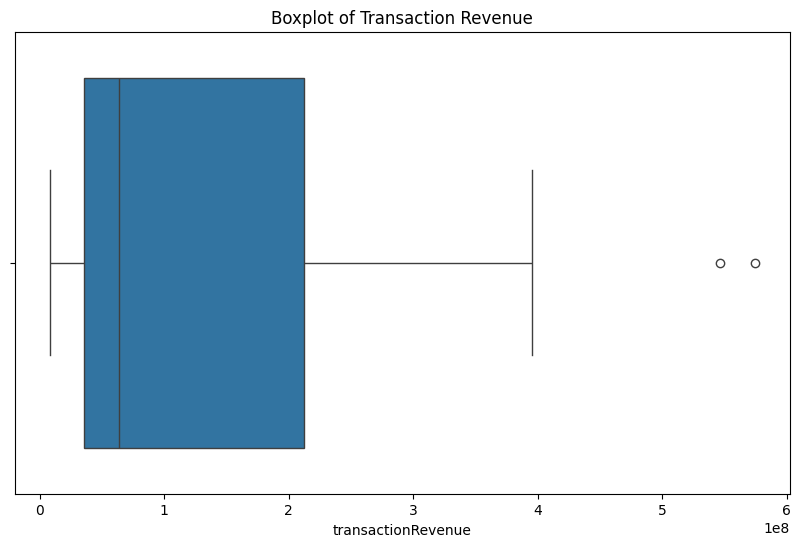

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert transactionRevenue to a numeric type if necessary (it may still be a string)
df['transactionRevenue'] = pd.to_numeric(df['transactionRevenue'], errors='coerce')

# Boxplot for transactionRevenue
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['transactionRevenue'].dropna())
plt.title('Boxplot of Transaction Revenue')
plt.show()

In [22]:
pageviews_data = df['pageviews'].dropna().values.tolist()

# Step 2: Write the D3.js code to generate the histogram
html_code = '''







'''

# Step 3: Display the D3.js code in Colab
from IPython.core.display import display, HTML
display(HTML(html_code))


In [23]:
# Prepare data for scatter plot
scatter_data = df[['visitNumber', 'pageviews']].dropna().values.tolist()

# D3.js scatter plot for visitNumber vs pageviews
html_code_scatter = '''







'''

from IPython.core.display import display, HTML
display(HTML(html_code_scatter))


In [24]:
from IPython.core.display import display, HTML

# Basic D3.js HTML setup
html_code = '''






'''

# Display the D3.js visualization
display(HTML(html_code))

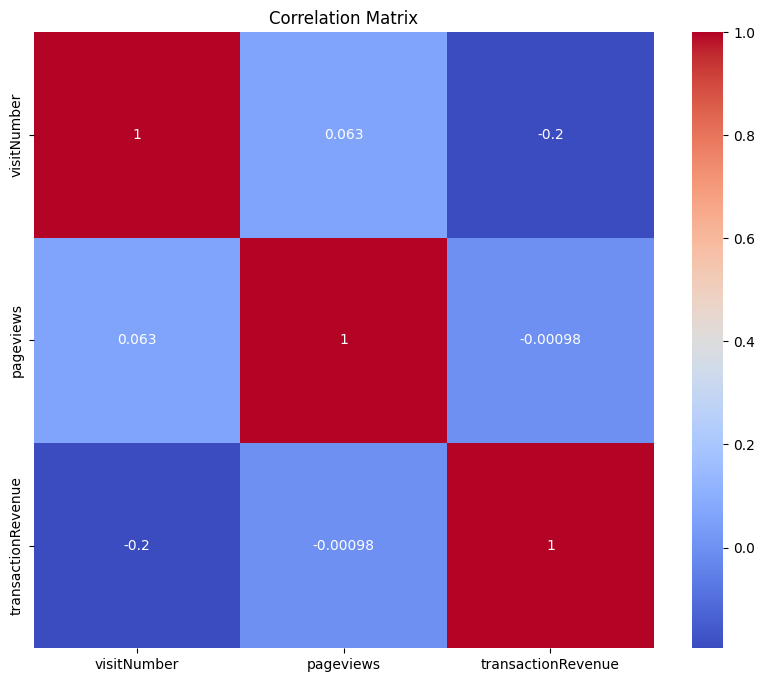

In [25]:
# Correlation matrix for numerical columns
corr_matrix = df[['visitNumber', 'pageviews', 'transactionRevenue']].corr()

# Visualize the correlation matrix using Seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [26]:
# Convert visitStartTime to datetime
df['visitStartTime'] = pd.to_datetime(df['visitStartTime'], unit='s')

# Extract date-related features
df['visitMonth'] = df['visitStartTime'].dt.month
df['visitDay'] = df['visitStartTime'].dt.day
df['visitHour'] = df['visitStartTime'].dt.hour

# Display the new features
df[['visitMonth', 'visitDay', 'visitHour']].head()

,visitMonth,visitDay,visitHour
0,9,2,15
1,9,3,5
2,9,3,1
3,9,3,5
4,9,2,13


In [27]:
# One-hot encoding for channelGrouping and trafficSource
df_encoded = pd.get_dummies(df, columns=['channelGrouping', 'trafficSource'])

# Display the encoded dataframe
df_encoded.head()

,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,visitId,visitNumber,visitStartTime,...,"trafficSource_{""referralPath"": ""/intl/de/permissions/using-the-logo.html"", ""campaign"": ""(not set)"", ""source"": ""google.com"", ""medium"": ""referral"", ""adwordsClickInfo"": {""criteriaParameters"": ""not available in demo dataset""}}","trafficSource_{""referralPath"": ""/intl/en/permissions/using-the-logo.html"", ""campaign"": ""(not set)"", ""source"": ""google.com"", ""medium"": ""referral"", ""adwordsClickInfo"": {""criteriaParameters"": ""not available in demo dataset""}}","trafficSource_{""referralPath"": ""/intl/hi/permissions/using-the-logo.html"", ""campaign"": ""(not set)"", ""source"": ""google.com"", ""medium"": ""referral"", ""adwordsClickInfo"": {""criteriaParameters"": ""not available in demo dataset""}}","trafficSource_{""referralPath"": ""/intl/pl/permissions/using-the-logo.html"", ""campaign"": ""(not set)"", ""source"": ""google.pl"", ""medium"": ""referral"", ""adwordsClickInfo"": {""criteriaParameters"": ""not available in demo dataset""}}","trafficSource_{""referralPath"": ""/mail/u/0/"", ""campaign"": ""(not set)"", ""source"": ""mail.google.com"", ""medium"": ""referral"", ""adwordsClickInfo"": {""criteriaParameters"": ""not available in demo dataset""}}","trafficSource_{""referralPath"": ""/od/Things-To-Do-in-Silicon-Valley/fl/How-To-Visit-the-Googleplex-the-Google-Head-Office-in-Mountain-View.htm"", ""campaign"": ""(not set)"", ""source"": ""siliconvalley.about.com"", ""medium"": ""referral"", ""adwordsClickInfo"": {""criteriaParameters"": ""not available in demo dataset""}}","trafficSource_{""referralPath"": ""/optimize/home/"", ""campaign"": ""(not set)"", ""source"": ""optimize.google.com"", ""medium"": ""referral"", ""adwordsClickInfo"": {""criteriaParameters"": ""not available in demo dataset""}}","trafficSource_{""referralPath"": ""/permissions/using-the-logo.html"", ""campaign"": ""(not set)"", ""source"": ""google.co.in"", ""medium"": ""referral"", ""adwordsClickInfo"": {""criteriaParameters"": ""not available in demo dataset""}}","trafficSource_{""referralPath"": ""/permissions/using-the-logo.html"", ""campaign"": ""(not set)"", ""source"": ""google.com"", ""medium"": ""referral"", ""adwordsClickInfo"": {""criteriaParameters"": ""not available in demo dataset""}}","trafficSource_{""referralPath"": ""/sticker/"", ""campaign"": ""(not set)"", ""source"": ""sashihara.jp"", ""medium"": ""referral"", ""adwordsClickInfo"": {""criteriaParameters"": ""not available in demo dataset""}}"
0,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",1131660440785968503,"{""continent"": ""Asia"", ""subContinent"": ""Western...",1131660440785968503_1472830385,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...",1472830385,1,2016-09-02 15:33:05,...,False,False,False,False,False,False,False,False,False,False
1,20160902,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",377306020877927890,"{""continent"": ""Oceania"", ""subContinent"": ""Aust...",377306020877927890_1472880147,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...",1472880147,1,2016-09-03 05:22:27,...,False,False,False,False,False,False,False,False,False,False
2,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",3895546263509774583,"{""continent"": ""Europe"", ""subContinent"": ""South...",3895546263509774583_1472865386,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...",1472865386,1,2016-09-03 01:16:26,...,False,False,False,False,False,False,False,False,False,False
3,20160902,"{""browser"": ""UC Browser"", ""browserVersion"": ""n...",4763447161404445595,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",4763447161404445595_1472881213,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...",1472881213,1,2016-09-03 05:40:13,...,False,False,False,False,False,Fa